In [26]:
import pandas as pd
df_res = pd.read_csv("data.csv", header=None)
import pickle
images = pickle.loads(df_res.loc[0,1])
index = pickle.loads(df_res.loc[0,2])
actions = pickle.loads(df_res.loc[0,3])
actions_new = pickle.loads(df_res.loc[0,4])

In [27]:
sub_action = actions_new[actions_new[:,0] == 0, :]
sub_image = images[:,:,actions_new[:,0] == 0]

In [28]:
def f(x): return x >30 and x < 60 and x%4 != 0 #x % 3 == 0 or x % 5 == 0
ind = filter(f, range(80))
def g(x): return x%2 != 0 #x % 3 == 0 or x % 5 == 0
ind_w = filter(g, range(80))

In [29]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

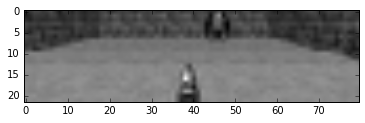

In [30]:
plt.imshow(images[ind,:,239], cmap='gray')

In [31]:
cropped_tmp = images[ind,:,:]
cropped = cropped_tmp[:,ind_w,:]
# plt.imshow(cropped[:,ind_w], cmap='gray')
cropped_tmp.shape

(22, 80, 3509)

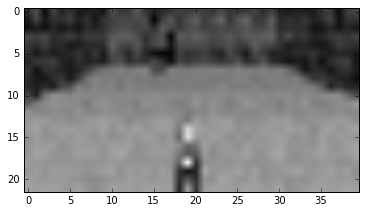

In [32]:
plt.imshow(cropped[:,:,1000], cmap='gray')

In [33]:
y = sub_action
sub_action.nonzero()[0][0]

0

In [34]:
y_target = np.zeros(y.shape[0])
for i in range(y_target.shape[0]):
    y_target[i]= sub_action[i].nonzero()[0][0]

In [35]:
y_target.shape

(1596,)

In [39]:
X = sub_image
cropped_tmp = X[ind,:,:]
cropped = cropped_tmp[:,ind_w,:]

x_turned =cropped.transpose(2,0,1).reshape(y_target.shape[0],-1)
# x_turned = np.rot90(np.flip(np.swapaxes(np.swapaxes(cropped, 2,0), 0,1),1),k=3)

In [40]:
x_turned.shape

(1596, 880)

In [41]:
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.model_selection import cross_val_score, KFold, StratifiedKFold

kfold = StratifiedKFold(n_splits= 5, shuffle= True)

clf = LogisticRegressionCV()

cv = kfold.split(x_turned, y_target)

scores = cross_val_score(clf, x_turned, y_target, scoring='accuracy', cv=cv)

print ('StratifiedKFold score: {0:.3f} ± {1:.3f}'.format(scores.mean(), scores.std()) )

StratifiedKFold score: 0.968 ± 0.012


In [42]:
kfold_num = 5

prime_numbers = [13, 17, 41, 43, 223, 227, 229, 233, 239, 2699]

for n in prime_numbers:
    kfold = StratifiedKFold(n_splits= kfold_num, shuffle= True, random_state= n)
    clf = LogisticRegressionCV()
    cv = kfold.split(x_turned, y_target)
    scores = cross_val_score(clf, x_turned, y_target, scoring='accuracy', cv=cv)
    print ('StratifiedKFold score: {0:.3f} ± {1:.3f}'.format(scores.mean(), scores.std()) )

StratifiedKFold score: 0.964 ± 0.007
StratifiedKFold score: 0.964 ± 0.010
StratifiedKFold score: 0.968 ± 0.009
StratifiedKFold score: 0.964 ± 0.005
StratifiedKFold score: 0.968 ± 0.005
StratifiedKFold score: 0.972 ± 0.007
StratifiedKFold score: 0.966 ± 0.012
StratifiedKFold score: 0.969 ± 0.009
StratifiedKFold score: 0.966 ± 0.007
StratifiedKFold score: 0.966 ± 0.010


In [44]:
sub_action.sum(axis = 0)

array([   0.,  282.,  590.,  724.])

In [46]:
y_target

array([ 3.,  3.,  3., ...,  3.,  1.,  1.])

In [51]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [49]:
x_train, x_test, y_train, y_test = train_test_split(x_turned, y_target )

In [54]:
LR = LogisticRegression(multi_class='ovr')

In [55]:
LR.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [59]:
LR.predict(x_test)[:50] == y_test[:50]

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True, False,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True, False,  True,  True,
        True,  True,  True,  True,  True], dtype=bool)

In [60]:
LR.coef_

array([[ 0.00856768, -0.01886612,  0.0087452 , ...,  0.00946313,
        -0.0079515 ,  0.00447484],
       [ 0.00606619, -0.00885183,  0.00206806, ...,  0.00050429,
        -0.00123097, -0.00364359],
       [-0.00789459,  0.02233854,  0.00364901, ..., -0.01590604,
         0.00637093, -0.0015155 ]])